# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key     

In [7]:
# Create the to append API data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Use try statement to append calls where value is found 
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter record by 1 for looping purposes
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Laguna
Processing Record 2 | Adrar
Processing Record 3 | La Ronge
Processing Record 4 | Mahébourg
Processing Record 5 | Busselton
City not found. Skipping...
Processing Record 6 | Hermanus
City not found. Skipping...
Processing Record 7 | Kapaa
Processing Record 8 | Khatanga
Processing Record 9 | Rikitea
Processing Record 10 | Qaanaaq
Processing Record 11 | Paamiut
Processing Record 12 | Vaini
Processing Record 13 | Ushuaia
Processing Record 14 | Hilo
Processing Record 15 | Gangarampur
Processing Record 16 | Mataura
Processing Record 17 | Kingsville
Processing Record 18 | Albany
Processing Record 19 | Sulangan
Processing Record 20 | Geraldton
Processing Record 21 | Port Alfred
Processing Record 22 | Chui
Processing Record 23 | Ostrovnoy
Processing Record 24 | George Town
Processing Record 25 | Āsosa
Processing Record 26 | Ahipara
Processing Record 27 | Shimoda
Processing Record 28 | Punta Arenas
Processing R

Processing Record 229 | Novo Aripuanã
Processing Record 230 | Mosquera
Processing Record 231 | Anito
Processing Record 232 | Saskylakh
Processing Record 233 | Zhangye
City not found. Skipping...
Processing Record 234 | Valleyview
Processing Record 235 | Eyl
Processing Record 236 | Sistranda
Processing Record 237 | Barcelos
City not found. Skipping...
Processing Record 238 | San Antonio
Processing Record 239 | Naryan-Mar
Processing Record 240 | Sangar
Processing Record 241 | Mount Isa
Processing Record 242 | Versailles
Processing Record 243 | Constitución
Processing Record 244 | Stornoway
Processing Record 245 | Aksarka
Processing Record 246 | Naze
City not found. Skipping...
Processing Record 247 | St. George's
Processing Record 248 | São Félix do Xingu
Processing Record 249 | Lüderitz
Processing Record 250 | Cabedelo
Processing Record 251 | Coquimbo
Processing Record 252 | Shingū
Processing Record 253 | Jaqué
Processing Record 254 | Santoña
Processing Record 255 | Bokoro
Processing Re

Processing Record 453 | Indramayu
Processing Record 454 | Pinega
Processing Record 455 | Johnstown
Processing Record 456 | Kombissiri
Processing Record 457 | Qasigiannguit
Processing Record 458 | Obihiro
Processing Record 459 | Laas
Processing Record 460 | Koumac
Processing Record 461 | Moose Factory
Processing Record 462 | Aliwal North
Processing Record 463 | Yulara
Processing Record 464 | Progreso
Processing Record 465 | Mackay
Processing Record 466 | Lensk
Processing Record 467 | Guarapari
Processing Record 468 | Khawhai
Processing Record 469 | Lagoa
Processing Record 470 | Ubari
Processing Record 471 | Orsha
Processing Record 472 | Wajir
Processing Record 473 | Maïné Soroa
Processing Record 474 | Bethel
Processing Record 475 | Alta Floresta
City not found. Skipping...
Processing Record 476 | Henties Bay
Processing Record 477 | Stokmarknes
Processing Record 478 | Buala
Processing Record 479 | Nioro
Processing Record 480 | Sémbé
Processing Record 481 | Mehamn
Processing Record 482 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Create a DataFrame for the results

weather_summary = pd.DataFrame({"City" : city_name,
                                 "Cloudiness" : cloudiness,
                                 "Country" : country,
                                 "Date": date,
                                 "Humidity" : humidity,
                                 "Lat" : lat,
                                 "Lng" : lng,
                                 "Max Temp" : max_temp,
                                 "Wind Speed": wind_speed})

weather_summary.count()
                                                           

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [17]:
#Export city data to CSV file
weather_summary.to_csv('output_data/weather_summary.csv')

#Display DataFrame head
weather_summary.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Laguna,1,US,1591111708,60,38.42,-121.42,73.0,5.48
1,Adrar,96,MR,1591111709,15,20.50,-10.07,103.5,2.04
2,La Ronge,75,CA,1591111593,51,55.10,-105.28,59.0,13.87
3,Mahébourg,75,MU,1591111711,94,-20.41,57.70,71.6,12.75
4,Busselton,0,AU,1591111713,71,-33.65,115.33,52.0,6.11


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
weather_summary.describe()
#Based on the describe fxn the max humidity is at 100%. Therefore we are okay to proceed!

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,560.000000,5.600000e+02,560.00000,560.000000,560.000000,560.000000,560.000000
mean,54.710714,1.591112e+09,65.07500,19.607893,18.220661,69.032464,7.749536
std,37.653707,2.117097e+02,22.59913,33.051871,88.681095,16.367668,5.189174
min,0.000000,1.591111e+09,3.00000,-54.800000,-179.170000,24.800000,0.180000
25%,20.000000,1.591112e+09,51.00000,-8.470000,-56.225000,55.982500,3.847500
50%,66.000000,1.591112e+09,71.00000,22.405000,23.045000,72.000000,6.710000
75%,91.000000,1.591112e+09,83.00000,47.670000,93.780000,80.932500,11.062500
max,100.000000,1.591112e+09,100.00000,78.220000,179.320000,113.000000,31.090000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

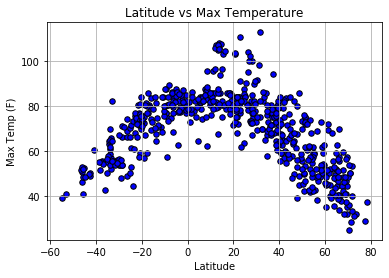

In [44]:
# Scatter plot function
plt.scatter(weather_summary["Lat"], weather_summary["Max Temp"],marker="o", facecolors="blue", edgecolors="black", 
           s=30)

# Assign graph properties
plt.title("Latitude vs Max Temperature")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Export plots as .pngs
plt.savefig("citygraph_plots/Latitude vs Max Temperature.png")

plt.show()



## Latitude vs. Humidity Plot

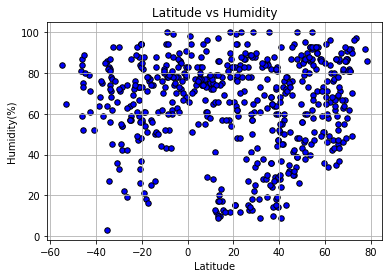

In [45]:
# Scatter plot function
plt.scatter(weather_summary["Lat"], weather_summary["Humidity"], marker="o", facecolors="blue", edgecolors="black", 
           s=30)

# Assign graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Export plots as .pngs
plt.savefig("citygraph_plots/Latitude vs Humidity.png")

plt.show()


## Latitude vs. Cloudiness Plot

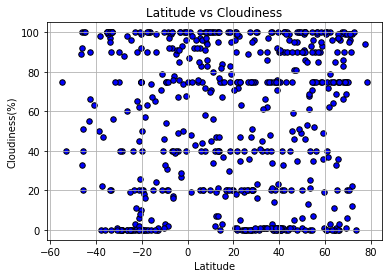

In [46]:
# Scatter plot function
plt.scatter(weather_summary["Lat"], weather_summary["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", 
           s=30)

# Assign graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Export plots as .pngs
plt.savefig("citygraph_plots/Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

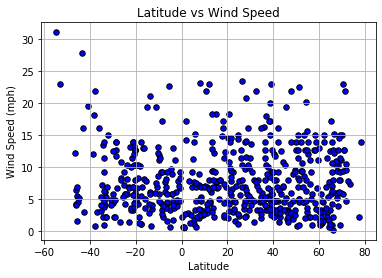

In [43]:
# Scatter plot function
plt.scatter(weather_summary["Lat"], weather_summary["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", 
           s=30)

# Assign graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Export plots as .pngs
plt.savefig("citygraph_plots/Latitude vs Wind Speed.png")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression